In [1]:
!wget https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937484-1629951672/carpet.tar.xz

--2023-04-13 02:51:48--  https://www.mydrive.ch/shares/38536/3830184030e49fe74747669442f0f282/download/420937484-1629951672/carpet.tar.xz
Resolving www.mydrive.ch (www.mydrive.ch)... 91.214.169.64
Connecting to www.mydrive.ch (www.mydrive.ch)|91.214.169.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 740285760 (706M) [application/x-xz]
Saving to: ‘carpet.tar.xz’

carpet.tar.xz       100%[===================>] 705.99M   106MB/s    in 8.3s    

2023-04-13 02:51:57 (84.6 MB/s) - ‘carpet.tar.xz’ saved [740285760/740285760]



In [2]:
!tar -xvf  'carpet.tar.xz' -C '/content'

carpet/
carpet/ground_truth/
carpet/ground_truth/color/
carpet/ground_truth/color/016_mask.png
carpet/ground_truth/color/017_mask.png
carpet/ground_truth/color/018_mask.png
carpet/ground_truth/color/000_mask.png
carpet/ground_truth/color/001_mask.png
carpet/ground_truth/color/002_mask.png
carpet/ground_truth/color/003_mask.png
carpet/ground_truth/color/004_mask.png
carpet/ground_truth/color/005_mask.png
carpet/ground_truth/color/006_mask.png
carpet/ground_truth/color/007_mask.png
carpet/ground_truth/color/008_mask.png
carpet/ground_truth/color/009_mask.png
carpet/ground_truth/color/010_mask.png
carpet/ground_truth/color/011_mask.png
carpet/ground_truth/color/012_mask.png
carpet/ground_truth/color/013_mask.png
carpet/ground_truth/color/014_mask.png
carpet/ground_truth/color/015_mask.png
carpet/ground_truth/cut/
carpet/ground_truth/cut/000_mask.png
carpet/ground_truth/cut/001_mask.png
carpet/ground_truth/cut/002_mask.png
carpet/ground_truth/cut/003_mask.png
carpet/ground_truth/cut/004_ma

In [3]:
!pip install alibi-detect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.2/338.2 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 96.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.9 MB/s eta 0:00:00


In [4]:
import os
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dense, Reshape, InputLayer, Flatten

from alibi_detect.od import OutlierAE, OutlierVAE
from alibi_detect.utils.visualize import plot_instance_score, plot_feature_outlier_image


2.12.0


In [23]:
##########################################################################
#Load data. We only need good data and anything NOT good is an outlier. 

image_directory = '/content/carpet/train/'
SIZE = 64
dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  

good_images = os.listdir(image_directory + 'good/')
for i, image_name in enumerate(good_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'good/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
dataset = np.array(dataset)

In [24]:
# split the dataset
train = dataset[0:200]
test = dataset[200:279]

#scaling the images between zero and 255
train = train.astype('float32') / 255.
test = test.astype('float32') / 255.

In [21]:
# making a set of bad samples 
import os
import random
import shutil

print(os.getcwd())
no_of_files = 10
!mkdir '/content/carpet/train/bad'
!mkdir '/content/arpet/train/bad1'

#color samples
#1
source = '/content/carpet/test/color'
dest1 = '/content/carpet/train/bad1'
files = os.listdir(source)
for file_name in random.sample(files, no_of_files):
    shutil.copy(os.path.join(source, file_name), dest1)

#2
os.chdir('/content/carpet/train/bad1')

for count, f in enumerate(os.listdir()):
    f_name, f_ext = os.path.splitext(f)
    f_name = "color" + str(count)
 
    new_name = f'{f_name}{f_ext}'
    os.rename(f, new_name)
#3
dest = '/content/carpet/train/bad'
files = os.listdir(dest1)

for file_name in random.sample(files, no_of_files):
    shutil.copy(os.path.join(dest1, file_name), dest)

#cut samples
#1
source = '/content/carpet/test/cut'
dest = '/content/carpet/train/bad1'
files = os.listdir(source)

for file_name in random.sample(files, no_of_files):
    shutil.copy(os.path.join(source, file_name), dest)

#2
for count, f in enumerate(os.listdir()):
    f_name, f_ext = os.path.splitext(f)
    f_name = "cut" + str(count)
 
    new_name = f'{f_name}{f_ext}'
    os.rename(f, new_name)
#3
dest = '/content/carpet/train/bad'
files = os.listdir(dest1)

for file_name in random.sample(files, no_of_files):
    shutil.copy(os.path.join(dest1, file_name), dest)

#hole samples
#1
source = '/content/carpet/test/hole'
dest = '/content/carpet/train/bad1'
files = os.listdir(source)

for file_name in random.sample(files, no_of_files):
    shutil.copy(os.path.join(source, file_name), dest)

#2
for count, f in enumerate(os.listdir()):
    f_name, f_ext = os.path.splitext(f)
    f_name = "hole" + str(count)
 
    new_name = f'{f_name}{f_ext}'
    os.rename(f, new_name)
#3
dest = '/content/carpet/train/bad'
files = os.listdir(dest1)

for file_name in random.sample(files, no_of_files):
    shutil.copy(os.path.join(dest1, file_name), dest)

#thread samples
#1
source = '/content/carpet/test/thread'
dest = '/content/carpet/train/bad1'
files = os.listdir(source)

for file_name in random.sample(files, no_of_files):
    shutil.copy(os.path.join(source, file_name), dest)

#2
for count, f in enumerate(os.listdir()):
    f_name, f_ext = os.path.splitext(f)
    f_name = "thread" + str(count)
 
    new_name = f'{f_name}{f_ext}'
    os.rename(f, new_name)
#3
dest = '/content/carpet/train/bad'
files = os.listdir(dest1)

for file_name in random.sample(files, no_of_files):
    shutil.copy(os.path.join(dest1, file_name), dest)

#thrmetal_contaminationead samples
#1
source = '/content/carpet/test/metal_contamination'
dest = '/content/carpet/train/bad1'
files = os.listdir(source)

for file_name in random.sample(files, no_of_files):
    shutil.copy(os.path.join(source, file_name), dest)

#2
for count, f in enumerate(os.listdir()):
    f_name, f_ext = os.path.splitext(f)
    f_name = "metal_contamination" + str(count)
 
    new_name = f'{f_name}{f_ext}'
    os.rename(f, new_name)
#3
dest = '/content/carpet/train/bad'
files = os.listdir(dest1)

for file_name in random.sample(files, no_of_files):
    shutil.copy(os.path.join(dest1, file_name), dest)


/content/carpet/train/bad1
mkdir: cannot create directory ‘/content/carpet/train/bad’: File exists
mkdir: cannot create directory ‘/content/arpet/train/bad1’: No such file or directory


In [25]:
#Let us also load bad images to verify our trained model. 
bad_images = os.listdir(image_directory + 'bad')
bad_dataset=[]
for i, image_name in enumerate(bad_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_directory + 'bad/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        bad_dataset.append(np.array(image))
bad_dataset = np.array(bad_dataset)
bad_dataset = bad_dataset.astype('float32') / 255.


In [29]:
#########################################################################
#Define the encoder - decoder network for input to the OutlierVAE detector class. 
#Can be any encoder and decoder. 

encoding_dim = 1024  #Dimension of the bottleneck encoder vector. 
dense_dim = [8, 8, 512] #Dimension of the last conv. output. This is used to work our way back in the decoder. 

#Define encoder
encoder_net = tf.keras.Sequential(
  [
      InputLayer(input_shape=train[0].shape),
      Conv2D(64, 4, strides=2, padding='same', activation=tf.nn.relu),
      Conv2D(128, 4, strides=2, padding='same', activation=tf.nn.relu),
      Conv2D(512, 4, strides=2, padding='same', activation=tf.nn.relu),
      Flatten(),
      Dense(encoding_dim,)
  ])

print(encoder_net.summary())
#print(encoder_net.input_shape)

#Define the decoder. 
#Start with the bottleneck dimension (encoder vector) and connect to dense layer 
#with dim = total nodes in the last conv. in the encoder. 
decoder_net = tf.keras.Sequential(
  [
      InputLayer(input_shape=(encoding_dim,)),
      Dense(np.prod(dense_dim)),
      Reshape(target_shape=dense_dim),
      Conv2DTranspose(256, 4, strides=2, padding='same', activation=tf.nn.relu),
      Conv2DTranspose(64, 4, strides=2, padding='same', activation=tf.nn.relu),
      Conv2DTranspose(3, 4, strides=2, padding='same', activation='sigmoid')
  ])

print(decoder_net.summary())
#print(decoder_net.input_shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        3136      
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       131200    
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 512)         1049088   
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 1024)              33555456  
                                                                 
Total params: 34,738,880
Trainable params: 34,738,880
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_1"
_________________

In [30]:
#######################################################################
#Define and train the outlier detector. 

latent_dim = 1024  #(Same as encoding dim. )

# initialize outlier detector
od = OutlierVAE(threshold=.015,  # threshold for outlier score above which the element is flagged as an outlier.
                score_type='mse',  # use MSE of reconstruction error for outlier detection
                encoder_net=encoder_net,  # can also pass VAE model instead
                decoder_net=decoder_net,  # of separate encoder and decoder
                latent_dim=latent_dim,
                samples=4)

print("Current threshold value is: ", od.threshold)

Current threshold value is:  0.015


In [31]:
# train
#from alibi_detect.models.tensorflow.losses import elbo #evidence lower bound loss

adam = tf.keras.optimizers.Adam(lr=1e-4)

od.fit(train,
       optimizer = adam,
       epochs=20,
       batch_size=4,
       verbose=True)



50/50 [=] - 4s 78ms/step - loss_ma: -20297.3959
Current threshold value is:  0.015


In [33]:
#
#infer_threshold Updates threshold by a value inferred from the percentage of 
#instances considered to be outliers in a sample of the dataset.
#percentage of X considered to be normal based on the outlier score.
#Here, we set it to 99%
od.infer_threshold(test, outlier_type='instance', threshold_perc=99.0)
print("Current threshold value is: ", od.threshold)

Current threshold value is:  0.0027593521028757093


In [ ]:
# save the trained outlier detector
#As mentioned in their documentation, save and load is having issues in python3.6 but works fine in 3.7
#from alibi_detect.utils import save_detector, load_detector  #If this does not work, try the next line
from alibi_detect.utils.saving import save_detector, load_detector #Use this if the above line does not work. 
save_detector(od, "saved_outlier_models/carpet_od_20epochs.h5")
#od = load_detector(filepath)

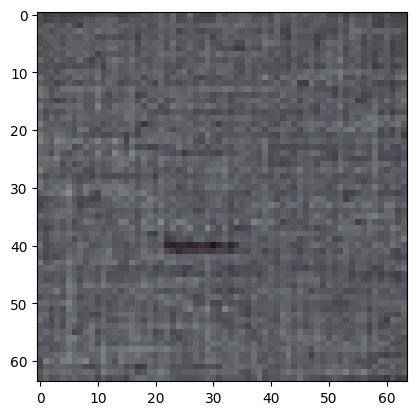

In [47]:
#Test our model on a bad image
img_num = 70
test_bad_image = bad_dataset[img_num].reshape(1, 64, 64, 3)
plt.imshow(test_bad_image[0])

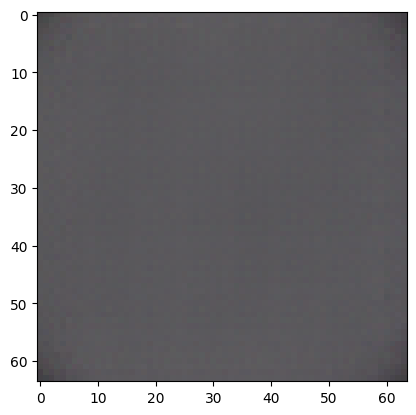

In [48]:
test_bad_image_recon = od.vae(test_bad_image)
test_bad_image_recon = test_bad_image_recon.numpy()
plt.imshow(test_bad_image_recon[0])

In [53]:
#to predict on that random image
test_bad_image_predict = od.predict(test_bad_image) #Returns a dictionary of data and metadata

#Data dictionary contains the instance_score, feature_score, and whether it is an outlier or not. 
#Let u look at the values under the 'data' key in our output dictionary
bad_image_instance_score = test_bad_image_predict['data']['instance_score'][0]
print("The instance score is:", bad_image_instance_score)

The instance score is: 0.0025886754


Is this image an outlier (0 for NO and 1 for YES)? 1


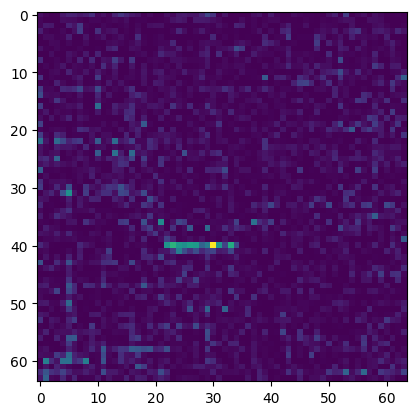

In [54]:
bad_image_feature_score = test_bad_image_predict['data']['feature_score'][0]
plt.imshow(bad_image_feature_score[:,:,0])
print("Is this image an outlier (0 for NO and 1 for YES)?", test_bad_image_predict['data']['is_outlier'][0])


In [52]:
#You can also manually define the threshold based on your specific use case. 
od.threshold = 0.002
print("Current threshld value is: ", od.threshold)


Current threshld value is:  0.002


In [57]:
#Let us check it for multiple images
X = bad_dataset[:20]

od_preds = od.predict(X,
                      outlier_type='instance',    # use 'feature' or 'instance' level
                      return_feature_score=True,  # scores used to determine outliers
                      return_instance_score=True)
print(list(od_preds['data'].keys()))


['instance_score', 'feature_score', 'is_outlier']


In [56]:
print(list(od_preds['data'].keys()))


['instance_score', 'feature_score', 'is_outlier']


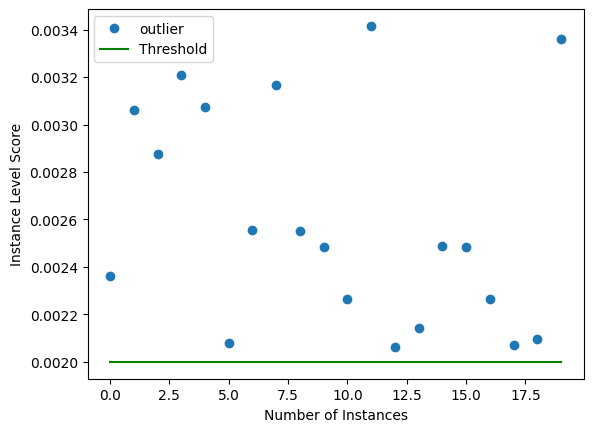

In [58]:
#Scatter plot of instance scores. using the built-in function for the scatterplot. 
target = np.ones(X.shape[0],).astype(int)  # Ground truth (all ones for bad images)
labels = ['normal', 'outlier']
plot_instance_score(od_preds, target, labels, od.threshold) #pred, target, labels, threshold


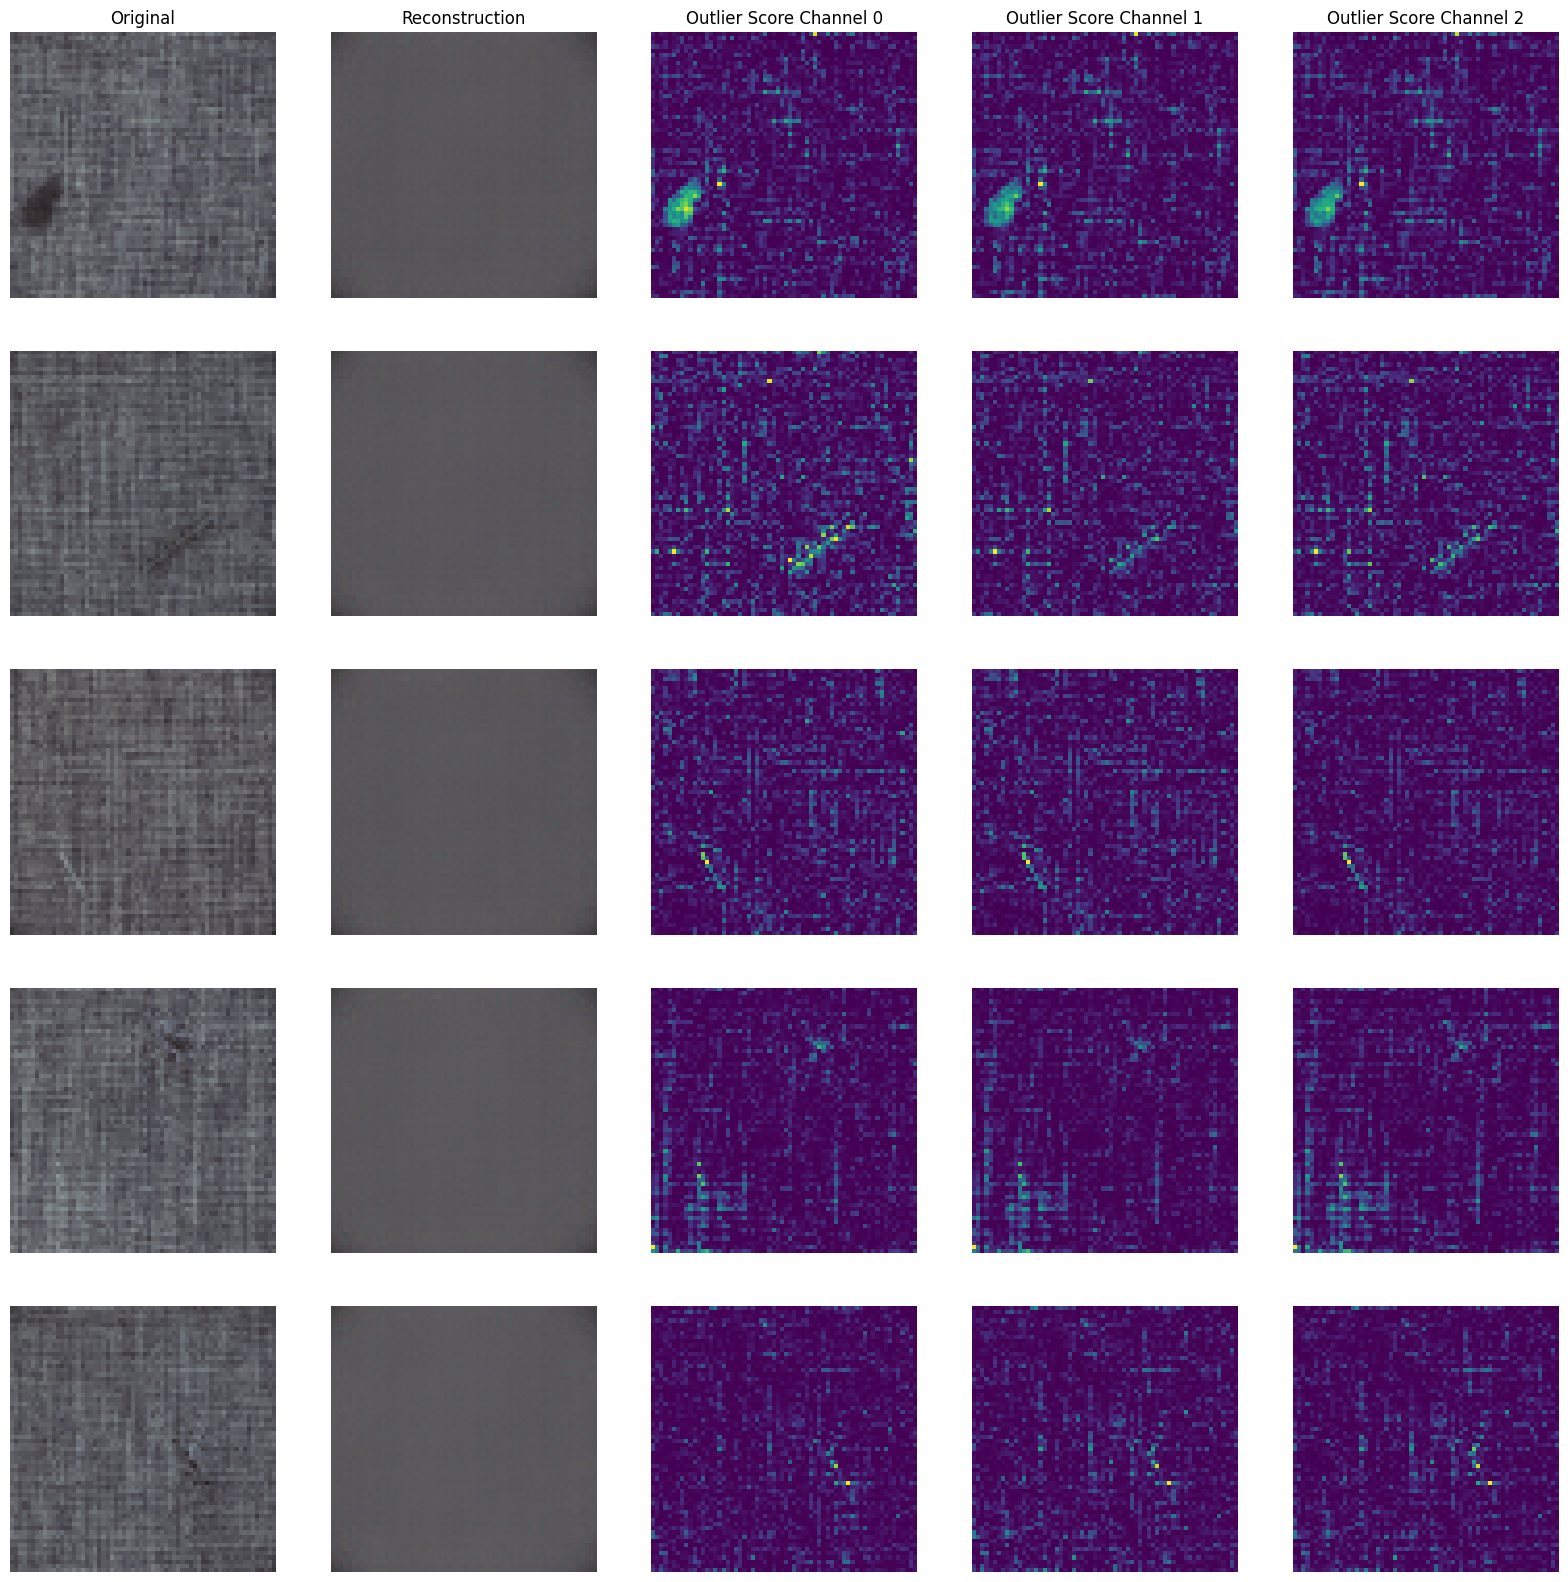

In [64]:
#Plot features for select images, using the built in function (plot_feature_outlier_image)
X_recon = od.vae(X).numpy()
plot_feature_outlier_image(od_preds,
                           X,
                           X_recon=X_recon,
                           instance_ids=[1, 5, 16, 19, 17],  # pass a list with indices of instances to display
                           max_instances=5,  # max nb of instances to display
                           outliers_only=False)  # only show outlier predictions
